In [106]:
import base64
from PIL import Image
import cv2
import requests
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import copy
import pytesseract
from PIL import ImageFilter

In [ ]:
image = 'forest.jpg'
f = open(image,'rb')

In [ ]:
f.read()

In [ ]:
img_b64 = base64.b64encode(f.read())

In [ ]:
img_b64

In [ ]:
origin_data = base64.b64decode(img_b64)

In [ ]:
origin_data

In [ ]:
im = Image.open('code.png')

with open('code.jpg','wb') as f:
    res = requests.get('http://serv.gcis.nat.gov.tw/pub/kaptcha.jpg')
    f.write(res.content)


im = Image.open('code.jpg').convert('RGB')
open_cv_image = np.array(im)

im2=Image.open('code.jpg')
im2
open_cv_image


plt.imshow(open_cv_image)

# 转为灰度图
imgray = cv2.cvtColor(open_cv_image,cv2.COLOR_BGR2GRAY)
# 
ret,thresh =cv2.threshold(imgray,127,255,0)
# plt.imshow(thresh)

contour,hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE),
type(hierarchy)
len(contour)

thresh

cnts = sorted([(c,cv2.boundingRect(c)[0]) for c in contour],key=lambda x:x[1])

arr=[],
for (c,_) in cnts:
    (x,y,w,h) =cv2.boundingRect(c)
    print(((x,y,w,h)))

In [ ]:
# RGB 去噪
img =Image.open('clipboard.png')

In [ ]:
plt.imshow(img)

In [ ]:
img.mode

In [ ]:
np_img = np.array(img)

In [ ]:
np_img.shape

In [ ]:
np_img[0,0,:]

In [ ]:
np_img

In [ ]:
img.getpixel((0,0))

In [ ]:
rgb_img = img.convert('RGB')

In [ ]:
plt.imshow(rgb_img)

In [ ]:
rgb_img.mode

In [ ]:
w,h = rgb_img.size

In [ ]:
w

In [ ]:
h

In [ ]:
R=0
G=0
B=0
for i in range(w):
    for j in range(h):
        r,g,b = rgb_img.getpixel((i,j))
        R=R+r
        G=G+g
        B=B+b        

In [ ]:
R

In [ ]:
G

In [ ]:
B

In [ ]:
total=R+G+B

In [ ]:
r_rate=R/total*100
g_rate=G/total*100
b_rate=B/total*100

In [ ]:
r_rate

In [ ]:
b_rate

In [ ]:
g_rate

In [ ]:
copy_img = np.zeros((w,h))

In [ ]:
copy_img

In [ ]:
rgb_img_copy = copy.copy(rgb_img)

In [ ]:
# rgb_img_copy = copy.copy(rgb_img)
rgb_img_copy=np.zeros((h,w))
for i in range(w):
    for j in range(h):
        r,g,b = rgb_img.getpixel((i,j))
        n = (r*r_rate+ b*b_rate+g*g_rate)/100
#         print(n)
        if n>40:
            rgb_img_copy[j,i]=255
#             rgb_img_copy[i,j]=[255,255,255]

        else:
            rgb_img_copy[j,i]=0
            
plt.imshow(rgb_img_copy)

In [ ]:
# 飘线 去除
img1 = Image.open('piaoxian1536227612.png').convert('RGB')
img2 = Image.open('piaoxian1536227133.png').convert('RGB')

In [ ]:
plt.imshow(img1)

In [ ]:
plt.imshow(img2)

In [ ]:
img1_array = np.array(img1)
img2_array = np.array(img2)

In [ ]:
for i in img2_array:
    print(i)

In [ ]:
img2_array.shape

In [ ]:
img1_array[0]

In [ ]:
diff = abs(img1_array-img2_array)/2

In [ ]:
diff.shape

In [ ]:
for i in diff:
    print(i)

In [ ]:
plt.imshow(diff)

In [ ]:
R=0
G=0
B=0
w,h=img1.size
for i in range(w):
    for j in range(h):
        r,g,b = img1.getpixel((i,j))
        R=R+r
        G=G+g
        B=B+b

In [ ]:
total=R+G+B
r_rate=R/total*100
g_rate=G/total*100
b_rate=B/total*100

In [ ]:
rgb_img_copy=np.zeros((h,w))
for i in range(w):
    for j in range(h):
        r,g,b = img1.getpixel((i,j))
        n = (r*r_rate+ b*b_rate+g*g_rate)/100
#         print(n)
        if n>160:
            rgb_img_copy[j,i]=255
#             rgb_img_copy[i,j]=[255,255,255]

        else:
            rgb_img_copy[j,i]=0
            
plt.imshow(rgb_img_copy)

In [ ]:
img1==img2

In [ ]:
diff_img = cv2.subtract(img2_array,img1_array)

In [ ]:
plt.imshow(diff_img)

In [ ]:
im1=cv2.imread('piaoxian1536227612.png')

In [ ]:
im1.shape

In [ ]:
b,g,r=im1.split()

In [ ]:
hist=cv2.calcHist(
[im1],
[2],
None,
[256],
[0,256]
)

In [ ]:
hist.size

In [ ]:
hist

In [ ]:
plt.hist(hist)

In [ ]:
import colorsys
 
def get_dominant_color(image):
    
    #颜色模式转换，以便输出rgb颜色值
    image = image.convert('RGBA')
    
    #生成缩略图，减少计算量，减小cpu压力
    image.thumbnail((200, 200))
    
    max_score = 0 #原来的代码此处为None
    dominant_color = 0 #原来的代码此处为None，但运行出错，改为0以后 运行成功，原因在于在下面的 score > max_score的比较中，max_score的初始格式不定
    
    for count, (r, g, b, a) in image.getcolors(image.size[0] * image.size[1]):
        # 跳过纯黑色
        if a == 0:
            continue
        
        saturation = colorsys.rgb_to_hsv(r / 255.0, g / 255.0, b / 255.0)[1]
       
        y = min(abs(r * 2104 + g * 4130 + b * 802 + 4096 + 131072) >> 13, 235)
       
        y = (y - 16.0) / (235 - 16)
        
        # 忽略高亮色
        if y > 0.9:
            continue
        
        # Calculate the score, preferring highly saturated colors.
        # Add 0.1 to the saturation so we don't completely ignore grayscale
        # colors by multiplying the count by zero, but still give them a low
        # weight.
        if ((r>200)&(g>200)&(b>200)):
            continue
        score = (saturation + 0.1) * count

        if score > max_score:
            max_score = score
            dominant_color = (r, g, b)

            
    return dominant_color
 

In [ ]:
img = Image.open('yezi.jpg')

In [ ]:
plt.imshow(img)

In [ ]:
rgba_array = np.array(img)

In [ ]:
rgba_array

In [ ]:
r_mode,g_mode,b_mode,a_mode=img.split()

In [ ]:
r_array = np.array(r_mode)

In [ ]:
for i in r_array:
    print(i)

In [ ]:
ret_color = get_dominant_color(img)

In [ ]:
ret_color

In [ ]:
def show_color(rgb):
#     print(r,g,b)
    r,g,b = rgb
    imgx = np.zeros((100,100,3))
    for i in range(100):
        for j in range(100):
            imgx[i,j]=[r/255,g/255,b/255]
#             imgx[i,j]=[r,g,b]

#     plt.imshow(imgx)

    return imgx

In [ ]:
new_img=show_color(ret_color)
plt.imshow(new_img)
# plt.imshow(new_img.astype(np.uint8))

In [ ]:
ret_color=(60, 165, 11)
new_img=show_color(ret_color)
plt.imshow(new_img)

newImage = Image.fromarray(new_img,mode='RGB')

In [ ]:
newImage

In [ ]:
new_img

In [ ]:
newImage.save('t.jpg')

In [ ]:
plt.imshow(Image.fromarray(new_img,mode='RGB'))

In [ ]:
image=Image.open('yezi.jpg').convert('RGBA')

for count, (r, g, b, a) in image.getcolors(image.size[0] * image.size[1]):
    print(count,' r g b a',(r,g,b,a))

In [ ]:
color_range = image.getcolors(image.size[0] * image.size[1])

In [ ]:
color_range

In [ ]:
image=Image.open('clipboard.png').convert('RGB')
color_range = image.getcolors(image.size[0] * image.size[1])
new_color_range=copy.copy(color_range)

for items in color_range:
    item=items[1]
    
    if (item[0]>240) & (item[1]>240) & (item[2]>240):
#         print(item)
        new_color_range.remove(items)
#         continue
#     else:
        
most_seen = sorted(new_color_range,key=lambda x:x[0],reverse=True)[:4]

In [ ]:
ret_color=(140, 3, 49)
new_img=show_color(ret_color)
plt.imshow(new_img)

In [ ]:
most_seen

In [ ]:
pixel_list = [item for count,item in most_seen]

In [ ]:
pixel_list

In [ ]:
area = 8
result = []
for x,y,z in pixel_list:
    print(x,y,z)
    for i in range(0,area,2):
        for j in range(0,area,2):
            for k in range(0,area,2):
                result.append((x+i,y+j,z+k))
                result.append((x-i,y-j,z-k))

#     result.append((x+))

In [ ]:
result

In [ ]:
type(pixel_list[0])

In [ ]:
pixel_list

In [ ]:
(60, 165, 110) in pixel_list

In [ ]:
a=[1,2,3]

In [ ]:
tuple(a)

In [6]:
image=Image.open('piaoxian1536226842.png').convert('RGB')
color_range = image.getcolors(image.size[0] * image.size[1])
new_color_range=copy.copy(color_range)

for items in color_range:
    item=items[1]
    
    if (item[0]>240) & (item[1]>240) & (item[2]>240):
#         print(item)
        new_color_range.remove(items)
#         continue
#     else:
        
most_seen = sorted(new_color_range,key=lambda x:x[0],reverse=True)[:4]

pixel_list = [item for count,item in most_seen]


area = 60
result = []
for x,y,z in pixel_list:
#     print(x,y,z)
    for i in range(0,area,2):
        for j in range(0,area,2):
            for k in range(0,area,2):
                result.append((x+i,y+j,z+k))
                result.append((x-i,y-j,z-k))
                

np_img = np.array(image)
# np_img.sh
x,y,z = np_img.shape
img_copy = np_img.copy()
for i in range(x):
    for j in range(y):
        # tuple 才能正常比较
        temp_t = tuple(np_img[i,j])
        if temp_t in pixel_list:
            continue
        else:
            img_copy[i,j]=np.array([255,255,255])
                
#         if np_img[i,j] not in pixel_list:
#             img_copy[i,j]=[255,255,255]

# print(count)

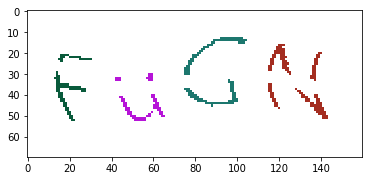

In [7]:
plt.imshow(img_copy)

In [ ]:
pytesseract.image_to_string(img_copy)

In [ ]:
x,y,z = np_img.shape

In [ ]:
result.shape

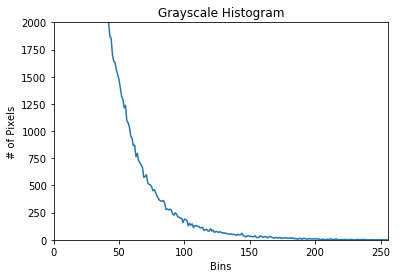

In [5]:
# 画直方图
image = cv2.imread("forest.jpg")
# cv2.imshow("Original",image)
imgage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#图像直方图
hist = cv2.calcHist([image],[0],None,[256],[0,256])

plt.figure() #新建一个图像
plt.title("Grayscale Histogram") #图像的标题
plt.xlabel("Bins") #X轴标签
plt.ylabel("# of Pixels") #Y轴标签
plt.plot(hist) #画图
plt.xlim([0,256]) #设置x坐标轴范围
plt.ylim([0,2000]) #设置x坐标轴范围

plt.show() #显示图像

In [3]:
# 图片转为矩阵
import cv2
file = ''
img = cv2.imread('1.jpg')

In [7]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [8]:
img_gray.shape

(12, 15)

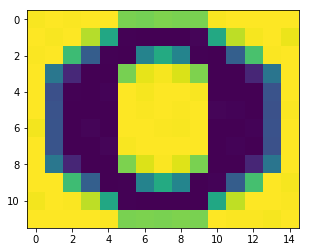

In [9]:
plt.imshow(img_gray)

In [3]:
type(img)

numpy.ndarray

In [10]:
img.shape

(12, 15, 3)

In [12]:
img[0][0]

array([253, 253, 253], dtype=uint8)

In [14]:
img_gray[0][0]

253

In [16]:
# 使用PIL 生成二维数据
from PIL import Image
import numpy as np

In [53]:
img = Image.open('clipboard.png').convert('L')
pixels = img.getdata()
# np.matrix(pixels)

In [55]:
np.array(pixels)

array([223, 222, 221, ..., 148, 150, 153])

In [51]:
np_data = np.array(pixels)

In [48]:
w,h=img.size

In [49]:
w

70

In [50]:
h

30

In [52]:
np_data

array([223, 222, 221, ..., 148, 150, 153])

In [42]:
# 不需要
new_np_data = np_data.reshape(h,w)

In [43]:
ret = (new_np_data > 127)*1.0

In [44]:
ret

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

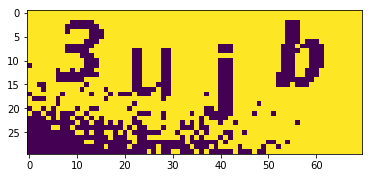

In [45]:
plt.imshow(ret)

In [39]:
new_ret = ret.reshape(h,w)

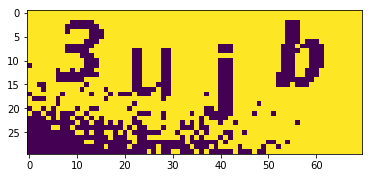

In [40]:
plt.imshow(new_ret)

In [46]:
bw=Image.open('clipboard.png').convert('1')

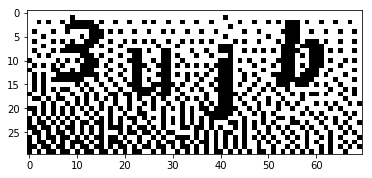

In [47]:
plt.imshow(bw)

In [67]:
# 清除漂线
img = Image.open('cbmqr-spnkd.jpg').convert('RGB')

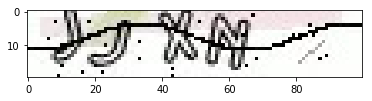

In [68]:
plt.imshow(img)

In [80]:
px = np.array(img.getdata())

In [81]:
pixdata=px.reshape(20,100,3)

In [82]:
px

array([[249, 255, 251],
       [251, 255, 252],
       [250, 252, 249],
       ...,
       [254, 254, 252],
       [254, 254, 252],
       [254, 254, 252]])

In [61]:
pixdata=px.copy()

In [83]:
for x in range(img.size[1]): 
        for y in range(img.size[0]):  
            if pixdata[x, y][0] < 8 or pixdata[x, y][1] < 6 or pixdata[x, y][2] < 8 or (pixdata[x, y][0] + pixdata[x, y][1] + pixdata[x, y][2]) <= 30:
                if y == 0:
                    pixdata[x, y] = (255, 255, 255)
                if y > 0:
                    if pixdata[x, y - 1][0] > 120 or pixdata[x, y - 1][1] > 136 or pixdata[x, y - 1][2] > 120:
                        pixdata[x, y] = (255, 255, 255)

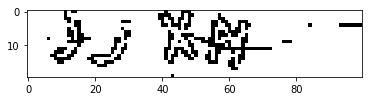

In [88]:
plt.imshow(pixdata)

In [87]:
for y in range(img.size[0]):  # 二值化处理，这个阈值为R=95，G=95，B=95
        for x in range(img.size[1]):
            if pixdata[x, y][0] < 160 and pixdata[x, y][1] < 160 and pixdata[x, y][2] < 160:
                pixdata[x, y] = (0, 0, 0)
            else:
                pixdata[x, y] = (255, 255, 255)


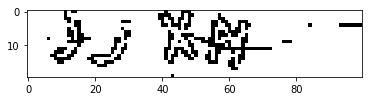

In [101]:
plt.imshow(pixdata)

In [90]:
img = Image.fromarray(pixdata)

TypeError: Cannot handle this data type

In [102]:
b = abs(np.fft.rfft2(pixdata,axes=(0,1)))
b = np.uint8(b)
b=Image.fromarray(b)

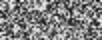

In [105]:
b.filter(ImageFilter.EDGE_ENHANCE_MORE)  # 深度边缘增强滤波，会使得图像中边缘部分更加明显（阈值更大），相当于锐化滤波
b.resize(((b.size[0]) * 2, (img.size[1]) * 2), Image.BILINEAR)

In [108]:
img = Image.open('cbmqr-spnkd.jpg')

In [109]:
img=img.convert('RGB')

In [110]:
img.load()

In [111]:
pixeldata = img.load()

In [112]:
for i in pixdata:
    print(i)

[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [  0   0   0]
 [255 255 255]
 [  0   0   0]
 [  0   0   0]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [  0   0   0]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 

In [114]:
def open_img(giffile):
    img = Image.open(giffile)   #打开图片
    img = img.convert('RGB')    #转换为RGB图
    pixdata = img.load()        #转换为像素点图
    return img, pixdata


def remove_line(giffile, savepath):
    
    (img, pixdata) = open_img(giffile)
    for x in range(img.size[0]):    #x坐标
        for y in range(img.size[1]):    #y坐标
            if pixdata[x, y][0] < 8 or pixdata[x, y][1] < 6 or pixdata[x, y][2] < 8 or (
                    pixdata[x, y][0] + pixdata[x, y][1] + pixdata[x, y][2]) <= 30:  #确定颜色阈值
                if y == 0:
                    pixdata[x, y] = (255, 255, 255)
                if y > 0:
                    if pixdata[x, y - 1][0] > 120 or pixdata[x, y - 1][1] > 136 or pixdata[x, y - 1][2] > 120:
                        pixdata[x, y] = (255, 255, 255) #?
#     plt.imshow(img)
    # 二值化处理
    for y in range(img.size[1]):  # 二值化处理，这个阈值为R=95，G=95，B=95
        for x in range(img.size[0]):
            if pixdata[x, y][0] < 160 and pixdata[x, y][1] < 160 and pixdata[x, y][2] < 160:
                pixdata[x, y] = (0, 0, 0)
            else:
                pixdata[x, y] = (255, 255, 255)
    img.filter(ImageFilter.EDGE_ENHANCE_MORE)  #深度边缘增强滤波，会使得图像中边缘部分更加明显（阈值更大），相当于锐化滤波
    img.resize(((img.size[0]) * 2, (img.size[1]) * 2), Image.BILINEAR)  # Image.BILINEAR指定采用双线性法对像素点插值#?
#     img.save(savepath+'captcha_removeline.jpg')
#     img.imshow()

In [115]:
remove_line('cbmqr-spnkd.jpg','cbmqr-spnkd')